<a href="https://colab.research.google.com/github/Shirisha111/ML/blob/master/Covid_19_and_World_Happiness_Report_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to work with COVID19 dataset, published by John Hopkins University, which consist of the data related to cumulative number of confirmed cases, per day, in each Country. Also we have another dataset consist of various life factors, scored by the people living in each country around the globe. We are going to merge these two datasets to see if there is any relationship between the spread of the the virus in a country and how happy people are, living in that country.



As part of this analysis we wanted to find out the relationship between the columns of different life factors and the spread of the virus in each of the countries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving time_series_covid19_confirmed_global.csv to time_series_covid19_confirmed_global.csv


In [ ]:
covid_dataset = pd.read_csv("time_series_covid19_confirmed_global.csv")

In [ ]:
covid_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166


In [ ]:
covid_dataset[covid_dataset["Country/Region"] == 'India']

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
131,NaN,India,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,67161,70768,74292,78055,81997,85784,90648,95698,100328,106475,112028,118226,124794,131423,138536,144950,150793,158086,165386,173491,181827,190609,198370,207191,216824,226713,236184,246622,257486,265928,276146,286605,297535,308993,320922,332424,343091,354065,366946,380532


In [ ]:
covid_dataset.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,208,208,208,220,235,235,235,235,246,251,251,251,251,251,251,299,441,443,458,463,479,483,484,484,484,485,499,499,513,513,514,611,632,639,659,661,662,671,683,688
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,56,65,70,85,106,122,128,130,167,184,197,209,212,222,233,249,256,278,283,310,323,354,399,419,453,469,482,484,496,524,560,591,632,705,728,844,885,902,909
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11,34,34,78,78,87,87,87,87,87,87,106,106,106,132,132,132,132,141,141,141,141,162,162,163,176,176,176,197,197,210
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,612,661,729,801,907,1118,1322,1524,1729,1936,2140,2350,2551,2738,2929,3100,3266,3424,3563,3686,3807,3930,4013,4100,4191,4289,4370,4453,4529,4609,4690,4763,4834,4902,4971,5035,5097,5160,5221,5279
265,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [ ]:
df=covid_dataset.drop(["Lat","Long"], axis=1)  # This will make a new copy of the Dataframe and will not delete from the original dataset
covid_dataset.drop(["Lat","Long"],axis=1,inplace=True) # This will delete the columns from original dataset also along with the newone

In [ ]:
covid_dataset.shape # Finding the shape of the dataset after dropping the columns using inplace=True

(266, 151)

In [ ]:
df.shape  # Finding the shape of the newly created dataset 

(266, 151)

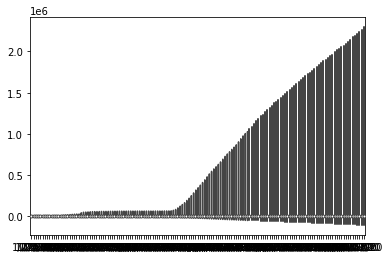

In [ ]:
sns.violinplot(data=covid_dataset)

In [ ]:
#Aggregating the rows by specific column
covid_dataset_aggregated= covid_dataset.groupby("Country/Region").sum()

In [ ]:
covid_dataset_aggregated.head()#The indices have been changed after the aggregation, before it was numbers and now the country names

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166


In [ ]:
covid_dataset_aggregated.shape # after aggregating

(188, 149)

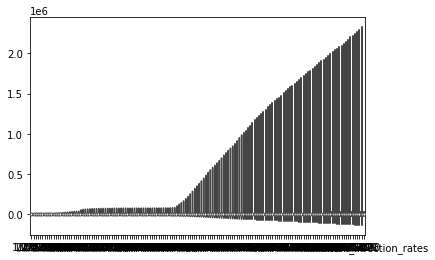

In [ ]:
sns.violinplot(data=covid_dataset_aggregated)

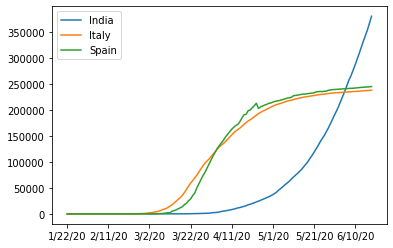

In [ ]:
covid_dataset_aggregated.loc["India"].plot()  # cumulative no.of cases relative to India
covid_dataset_aggregated.loc["Italy"].plot()
covid_dataset_aggregated.loc["Spain"].plot()
plt.legend()

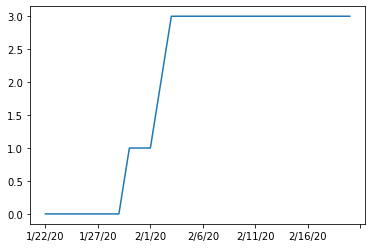

In [ ]:
covid_dataset_aggregated.loc["India"][:30].plot()  # plotting for first 3 days

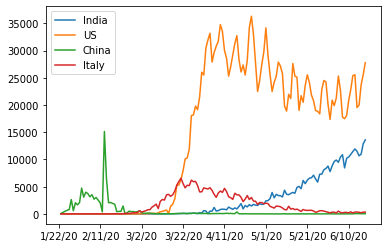

In [ ]:
covid_dataset_aggregated.loc["India"].diff().plot() # gives the change in infection rate daywise by calculating the first derivative
covid_dataset_aggregated.loc["US"].diff().plot()
covid_dataset_aggregated.loc["China"].diff().plot()
covid_dataset_aggregated.loc["Italy"].diff().plot()
plt.legend()

Finding maximum infection rates for all the countries

In [ ]:
#finding the maximum infection rate in a day by calculating the first derivative
covid_dataset_aggregated.loc["India"].diff().max()

13586.0

In [ ]:
covid_dataset_aggregated.loc["China"].diff().max()

15136.0

In [ ]:
covid_dataset_aggregated.loc["US"].diff().max()

36291.0

In [ ]:
covid_dataset_aggregated.loc["Italy"].diff().max()

6557.0

In [ ]:
# finding the maximum infection rate  for all of the countries
countries = list(covid_dataset_aggregated.index)
maximum_infection_rates=[]
for c in countries:
  maximum_infection_rates.append(covid_dataset_aggregated.loc[c].diff().max())  # appending the max infection rates of all the countries to
  # the empty list created
maximum_infection_rates  # printing the max infection rates of all the countries

[915.0,
 82.0,
 199.0,
 79.0,
 17.0,
 6.0,
 1958.0,
 766.0,
 497.0,
 1321.0,
 387.0,
 7.0,
 786.0,
 4008.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 102.0,
 11.0,
 913.0,
 147.0,
 19.0,
 34918.0,
 26.0,
 137.0,
 41.0,
 24.0,
 21.0,
 45.0,
 31.0,
 1183.0,
 2778.0,
 216.0,
 83.0,
 36179.0,
 15136.0,
 4272.0,
 44.0,
 155.0,
 183.0,
 86.0,
 384.0,
 96.0,
 74.0,
 58.0,
 381.0,
 391.0,
 99.0,
 280.0,
 5.0,
 629.0,
 11536.0,
 1691.0,
 134.0,
 358.0,
 31.0,
 134.0,
 51.0,
 251.0,
 5.0,
 267.0,
 26849.0,
 570.0,
 5.0,
 42.0,
 6933.0,
 921.0,
 156.0,
 6.0,
 617.0,
 278.0,
 156.0,
 12.0,
 332.0,
 3.0,
 643.0,
 210.0,
 99.0,
 13586.0,
 1331.0,
 3574.0,
 1554.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 696.0,
 213.0,
 851.0,
 121.0,
 1073.0,
 187.0,
 3.0,
 48.0,
 63.0,
 2.0,
 40.0,
 76.0,
 21.0,
 90.0,
 234.0,
 7.0,
 63.0,
 102.0,
 277.0,
 190.0,
 81.0,
 52.0,
 201.0,
 41.0,
 5662.0,
 478.0,
 12.0,
 56.0,
 30.0,
 281.0,
 55.0,
 4.0,
 671.0,
 1346.0,
 89.0,
 480.0,
 69.0,
 745.0,
 194.0,
 386.0,
 1

In [ ]:
  # Adding the maximum infection rate column to the aggregated dataset
  covid_dataset_aggregated["maximum_infection_rates"] = maximum_infection_rates
  covid_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,maximum_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,915.0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,82.0
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,79.0
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,17.0


Creating a new dataframe with only needed columns

In [ ]:
corona_data = pd.DataFrame(covid_dataset_aggregated["maximum_infection_rates"])
corona_data.head()

,maximum_infection_rates
Country/Region,
Afghanistan,915.0
Albania,82.0
Algeria,199.0
Andorra,79.0
Angola,17.0


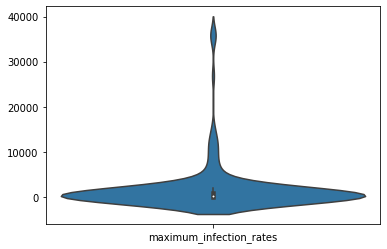

In [ ]:
sns.violinplot(data=corona_data)

1. Importing the WorldHappinessReport dataset



2. Selecting the needed columns for our analysis

3. Join the datasets

4. Calculate the correlations as the result of our analysis

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WorldHappinessReport.csv to WorldHappinessReport.csv


In [ ]:
happiness_report = pd.read_csv("WorldHappinessReport.csv")
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]
happiness_report.drop(cols,axis=1,inplace=True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [ ]:
# setting country as an index so that it would be easier to join the datasets by countries
happiness_report.set_index("Country or region",inplace=True) 
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


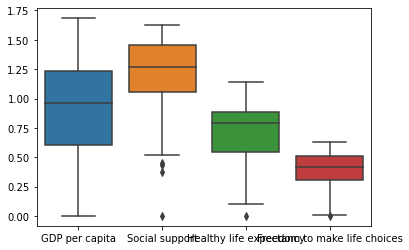

In [ ]:
sns.boxplot(data=happiness_report)

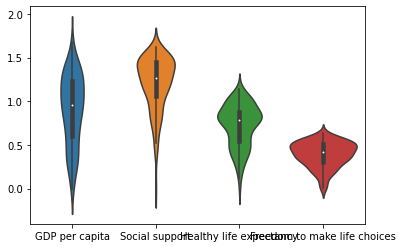

In [ ]:
sns.violinplot(data=happiness_report)

Joining two datasets

In [ ]:
corona_data.head()

,maximum_infection_rates
Country/Region,
Afghanistan,915.0
Albania,82.0
Algeria,199.0
Andorra,79.0
Angola,17.0


In [ ]:
corona_data.shape

(188, 1)

In [ ]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [ ]:
happiness_report.shape

(156, 4)

In [ ]:
# So now to join the datasets we have to perform inner join because the no.of countries 
# we have in corona dataset is more than happiness report
# "how" says the method we want to perform to join
data = corona_data.join(happiness_report, how="inner")
data.head()

,maximum_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,82.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,1958.0,1.092,1.432,0.881,0.471
Armenia,766.0,0.850,1.055,0.815,0.283


Correlation matrix

In [ ]:
data.corr()

,maximum_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
maximum_infection_rates,1.000000,0.189901,0.136986,0.197700,0.049129
GDP per capita,0.189901,1.000000,0.757521,0.859431,0.394799
Social support,0.136986,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.197700,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.049129,0.394799,0.456317,0.423146,1.000000


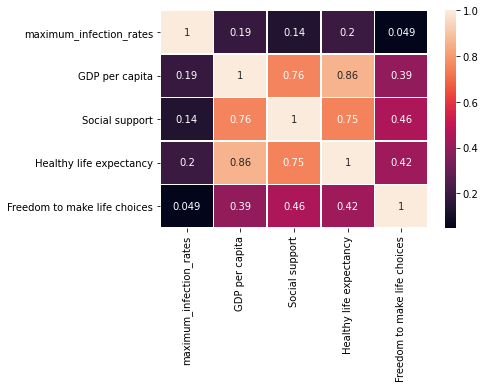

In [ ]:
sns.heatmap(data.corr(), annot=True, linewidths = .5)

The above correlation shows that there is a positive relationship between the maximum infection rate and the different life factors

In [ ]:
data.head()

,maximum_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,82.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,1958.0,1.092,1.432,0.881,0.471
Armenia,766.0,0.850,1.055,0.815,0.283


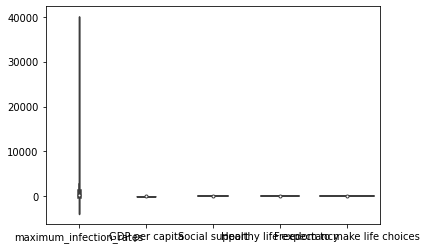

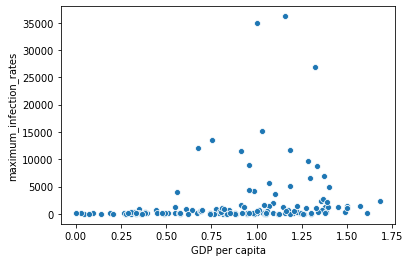

In [ ]:

x = data["GDP per capita"]
y = data["maximum_infection_rates"]
sns.scatterplot(x,y) 

With the above plot we are not able to find out the enough details  due to the difference between our x and y axis scale, so lets apply numpy log function to y axis and try.

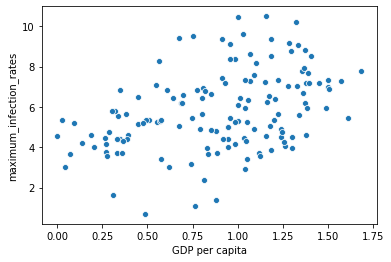

In [ ]:
sns.scatterplot(x, np.log(y))

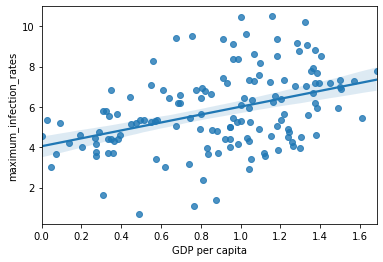

In [ ]:
# for better visualization we will use regplot 
sns.regplot(x, np.log(y))

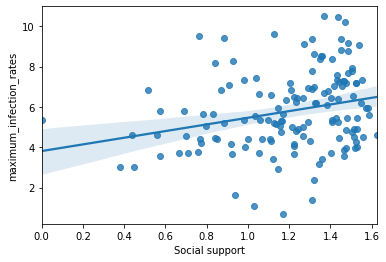

In [ ]:
x= data["Social support"]
y = data["maximum_infection_rates"]
sns.regplot(x, np.log(y))

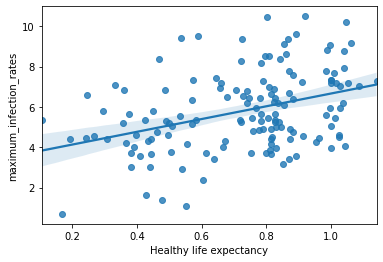

In [ ]:
x = data["Healthy life expectancy"]
y = data["maximum_infection_rates"]
sns.regplot(x,np.log(y))

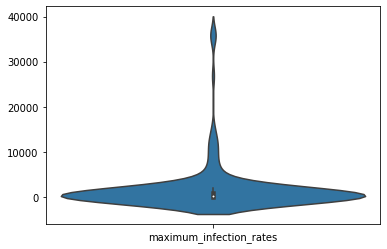

In [ ]:
f, ax = plt.subplots()
sns.violinplot(data=corona_data)
sns.despine(offset=10, trim=True);